# Gekozen dataset en beschrijving



In [1]:
import pandas

# Read the data into dataframes
csgo_kills = pandas.read_csv("esea_master_kills_demos.part1.csv")
csgo_match_meta_info = pandas.read_csv("esea_meta_demos.part1.csv")

# Merge the two dataframes
csgo_kills = csgo_kills.merge(csgo_match_meta_info, on=["file", "round"])

# Calculate the round length in seconds
csgo_kills["round_length"] = csgo_kills["end_seconds"] - csgo_kills["start_seconds"]

# Drop the start_seconds and end_seconds columns
csgo_kills = csgo_kills.drop(["start_seconds", "end_seconds"], axis=1)

# Replace the "Terrorist" and "CounterTerrorist" values with 1 and 0
csgo_kills = csgo_kills.replace("Terrorist", 1)
csgo_kills = csgo_kills.replace("CounterTerrorist", 0)

# Replace True for 1 and False for 0
csgo_kills = csgo_kills.replace(True, 1)
csgo_kills = csgo_kills.replace(False, 0)

# Create a new column total_alive
csgo_kills["total_alive"] = csgo_kills["ct_alive"] + csgo_kills["t_alive"]

# Print the first 5 rows of the dataframe
csgo_kills.head()

,file,round,tick,seconds,att_team,vic_team,att_side,vic_side,wp,wp_type,...,t_alive,is_bomb_planted,map,winner_team,winner_side,round_type,ct_eq_val,t_eq_val,round_length,total_alive
0,esea_match_13770997.dem,1,16058,30.74165,Animal Style,Hentai Hooligans,0,1,USP,Pistol,...,4,0,de_overpass,Hentai Hooligans,1,PISTOL_ROUND,4300,4250,66.65128,9
1,esea_match_13770997.dem,1,16210,31.93185,Hentai Hooligans,Animal Style,1,0,Glock,Pistol,...,4,0,de_overpass,Hentai Hooligans,1,PISTOL_ROUND,4300,4250,66.65128,8
2,esea_match_13770997.dem,1,16510,34.28094,Hentai Hooligans,Animal Style,1,0,Glock,Pistol,...,4,0,de_overpass,Hentai Hooligans,1,PISTOL_ROUND,4300,4250,66.65128,7
3,esea_match_13770997.dem,1,17104,38.93212,Animal Style,Hentai Hooligans,0,1,USP,Pistol,...,3,0,de_overpass,Hentai Hooligans,1,PISTOL_ROUND,4300,4250,66.65128,6
4,esea_match_13770997.dem,1,17338,40.76441,Hentai Hooligans,Animal Style,1,0,Glock,Pistol,...,3,0,de_overpass,Hentai Hooligans,1,PISTOL_ROUND,4300,4250,66.65128,5


<AxesSubplot:xlabel='seconds', ylabel='total_alive'>

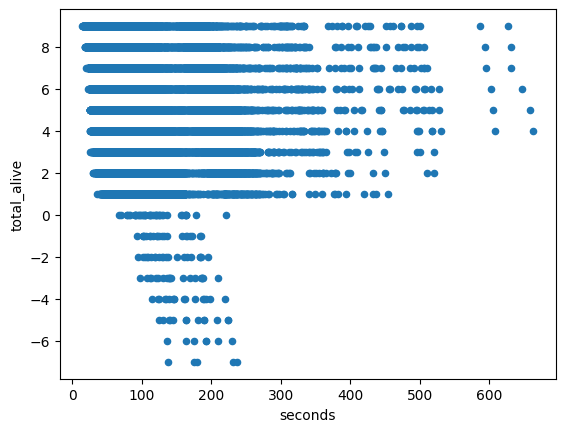

In [5]:
# Plot total_alive against seconds
csgo_kills.plot(x="seconds", y="total_alive", kind="scatter")